# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 26th, 2023 at 23:55. Hand in your files via DTU Learn. 

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import re
import logging

# Set Matplotlib's logger to ignore warnings
logging.getLogger('matplotlib').setLevel(logging.ERROR)

C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\3822328236.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
initial_data_df = pd.read_csv(r'D:\Projects\socialdata2024\solutions\data\Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240225.csv')

# filter and keep only the data before 2018
initial_data_df['Date'] = pd.to_datetime(initial_data_df['Date'])
initial_data_df = initial_data_df[initial_data_df['Date'].dt.year < 2018]
print("After filtering the data before 2018:")
print(f"Data shape: {initial_data_df.shape}")
print(f"Data columns: \n {initial_data_df.columns}")

After filtering the data before 2018:
Data shape: (2084466, 35)
Data columns: 
 Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
# sort the focuscrimes
focuscrimes = sorted(focuscrimes)

### Question  


For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).
* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

### Code solution

C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\1536155105.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


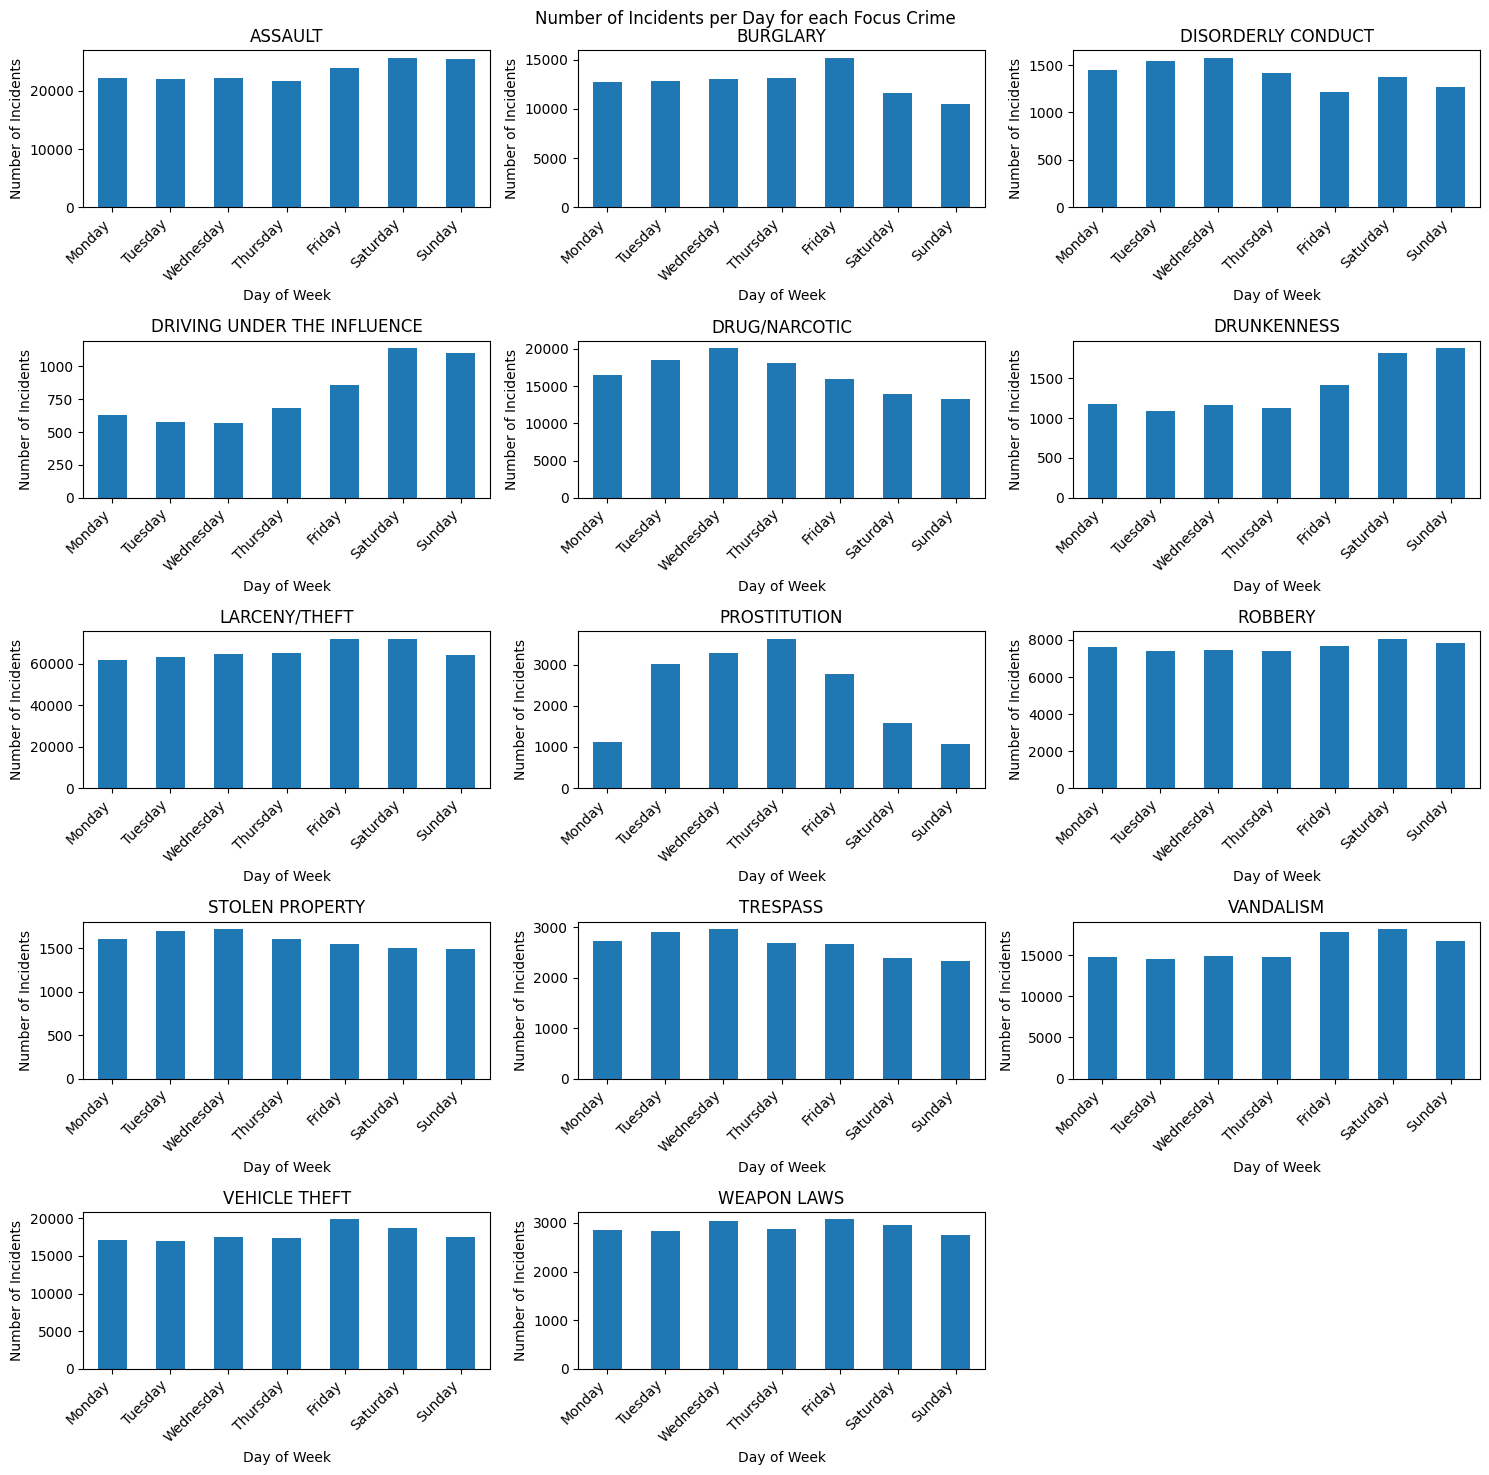

In [4]:
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
initial_data_df['DayOfWeek'] = initial_data_df['Date'].dt.dayofweek

# Define a figure with a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each focus crime and create a bar chart
for i, crime in enumerate(focuscrimes):
    # Filter data for the current crime
    crime_df = initial_data_df[initial_data_df['Category'] == crime]
    crime_df = crime_df.groupby('DayOfWeek').size()

    crime_df.index = crime_df.index.map(days_mapping)

    # Plot the bar chart on the corresponding subplot
    crime_df.plot(kind='bar', ax=axs[i], title=crime)
    axs[i].set_xlabel('Day of Week')
    axs[i].set_ylabel('Number of Incidents')

# Remove any empty subplots
for j in range(len(focuscrimes), len(axs)):
    fig.delaxes(axs[j])
# rotate x-axis labels
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# fig title and add space between title and subplots
fig.suptitle('Number of Incidents per Day for each Focus Crime')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Comments

It is interesting to see that there is most of the crimes show an increase in the number of crimes during the weekend. As I would also assume.  
However, it is also interesting that prostitution and drug/narcotic crimes are more common at the middle of the week.
Furthmore, it is evident that driving under the influence is way more common during the weekend.

C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\94710324.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


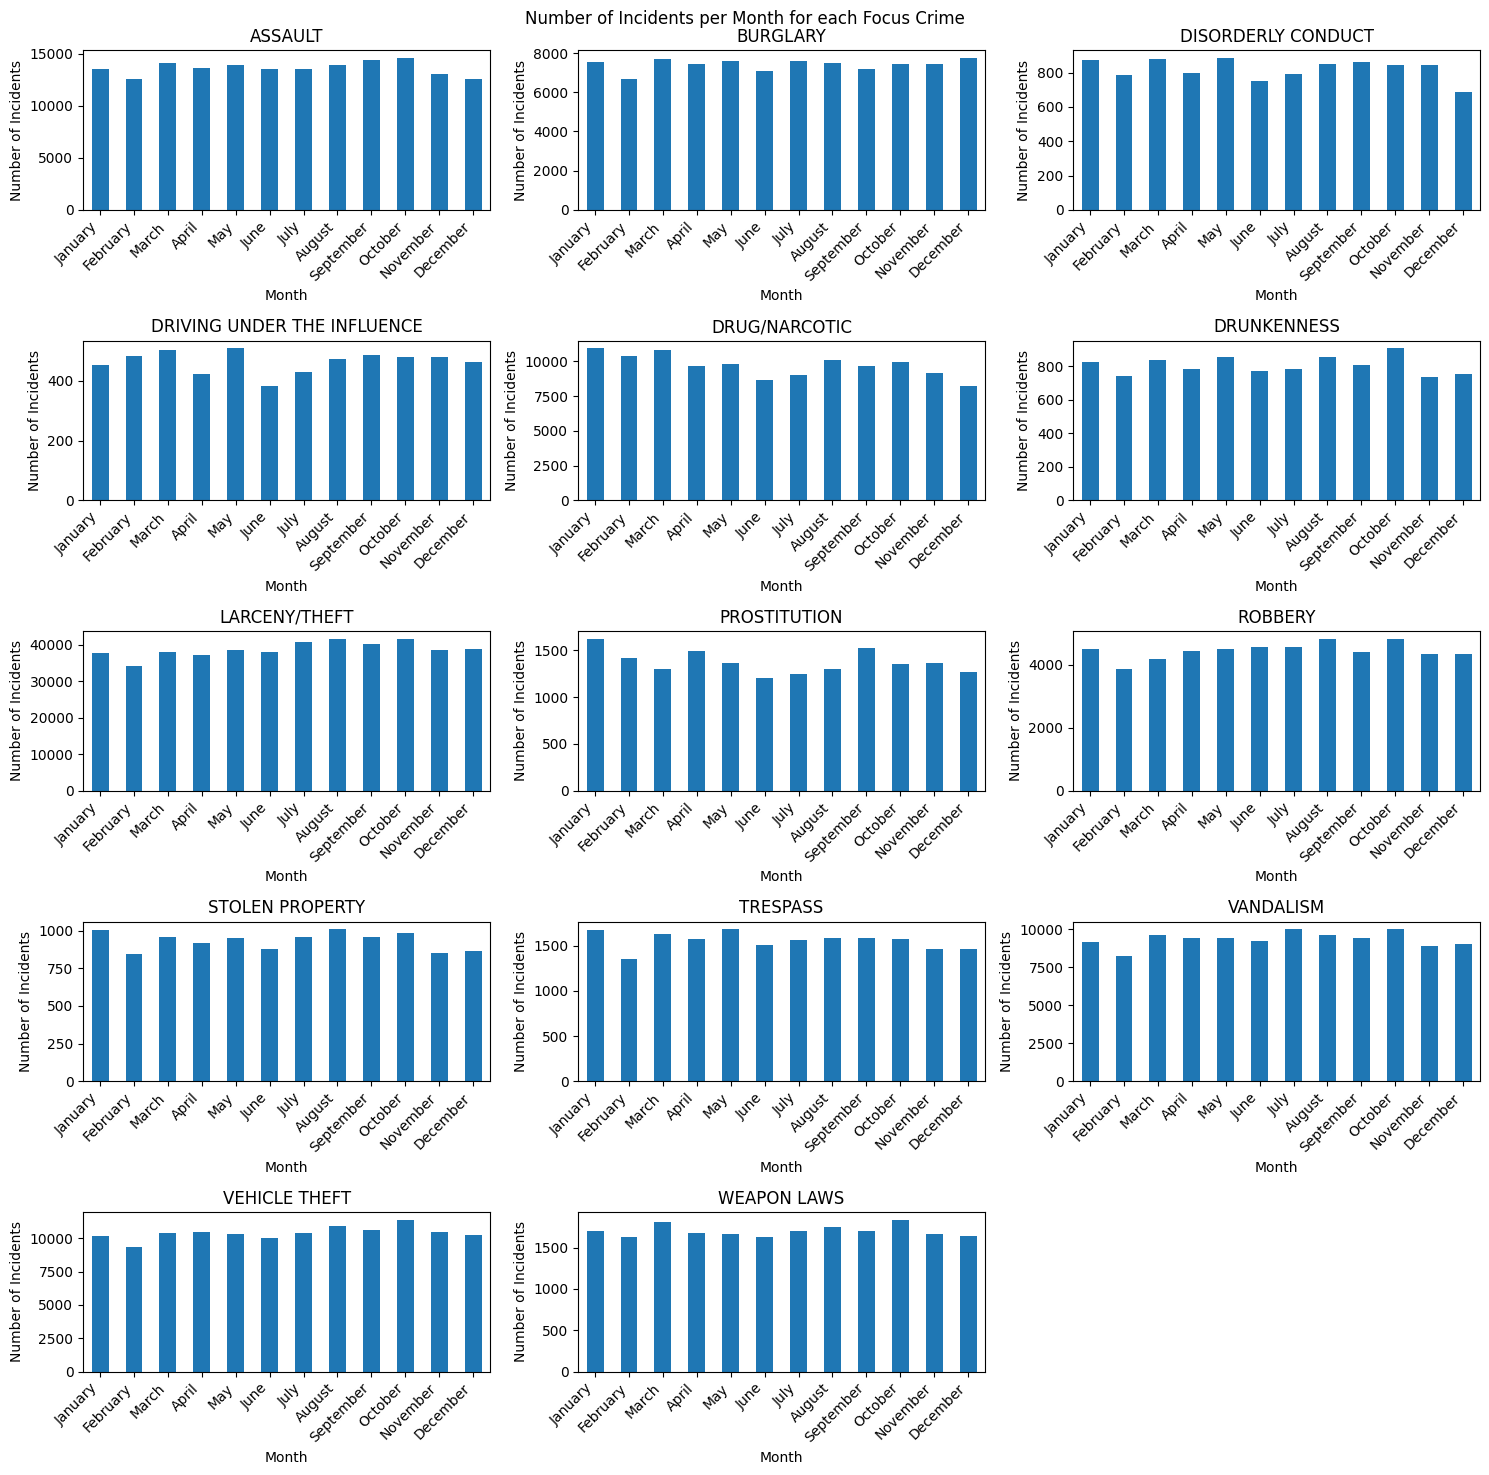

In [5]:
months_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
initial_data_df['Month'] = initial_data_df['Date'].dt.month

# Define a figure with a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each focus crime and create a bar chart
for i, crime in enumerate(focuscrimes):
    # Filter data for the current crime
    crime_df = initial_data_df[initial_data_df['Category'] == crime]
    crime_df = crime_df.groupby('Month').size()

    crime_df.index = crime_df.index.map(months_mapping)

    # Plot the bar chart on the corresponding subplot
    crime_df.plot(kind='bar', ax=axs[i], title=crime)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Number of Incidents')

# Remove any empty subplots
for j in range(len(focuscrimes), len(axs)):
    fig.delaxes(axs[j])
# rotate x-axis labels
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# fig title and add space between title and subplots
fig.suptitle('Number of Incidents per Month for each Focus Crime')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Comments

Combining the day plot and the month plot one can notice that the narcotics and prostitution crimes seem to follow the same pattern.  
Another worth mentioning insight is that driving under the influence is in decline during the first two summer months. Which might be a bit surprising, as one would assume that the number of DUIs would increase during the summer months because people are more likely to be out and have a drink.

C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\1323124040.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


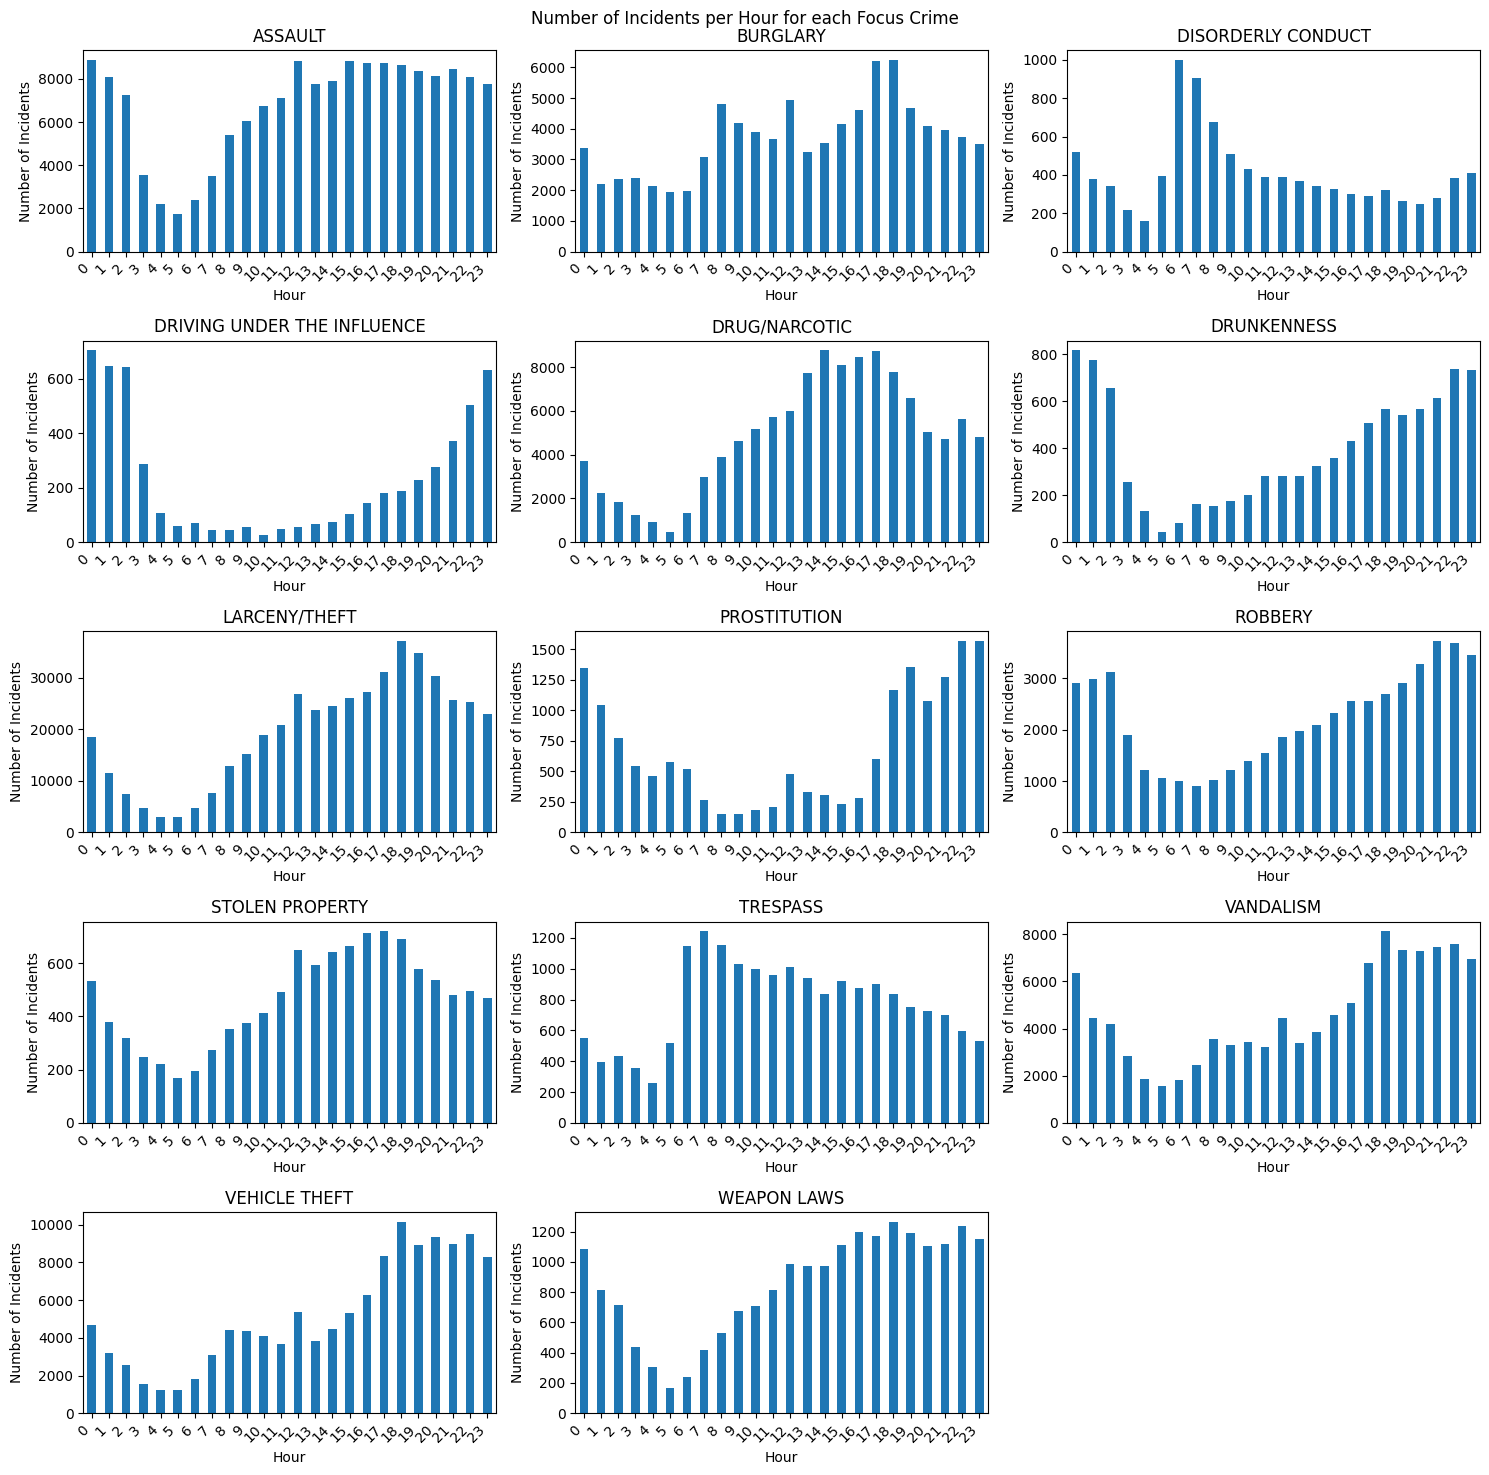

In [6]:
# now group by Time but only the hour
initial_data_df['Hour'] = initial_data_df['Time'].str.extract(r'(\d+):').astype(int)
initial_data_df['Hour'] = initial_data_df['Hour'].apply(lambda x: 0 if x == 24 else x)

# Define a figure with a 5x3 grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each focus crime and create a bar chart
for i, crime in enumerate(focuscrimes):
    # Filter data for the current crime
    crime_df = initial_data_df[initial_data_df['Category'] == crime]
    crime_df = crime_df.groupby('Hour').size()

    # Plot the bar chart on the corresponding subplot
    crime_df.plot(kind='bar', ax=axs[i], title=crime)
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Number of Incidents')

# Remove any empty subplots
for j in range(len(focuscrimes), len(axs)):
    fig.delaxes(axs[j])
# rotate x-axis labels
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# fig title and add space between title and subplots
fig.suptitle('Number of Incidents per Hour for each Focus Crime')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Comments

There are three things that stand out to me in the 24-hour cycle plot:  
- Disorderly conduct is more common the morning hours from 6 to 9 am. It is interesting to see whether road rage is classified as disorderly conduct. People are more likely to be in a hurry in the morning and might be more prone to road rage.  
- For me, it is surprising that vehicle theft has a peak at 19:00 and remains high until 23:00. I would expect that it would have the peak early morning hours (1-5am) but it is the opposite.  
- Lastly, burglary has it peak at 18:00-19:00 and has two other peaks at 09:00 and 12:00. It seems that burglars prefer hours that people are absent due to work or for leasure. It is surprising though that the day light does not affect their decision.

C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\1696008207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['HourOfWeek'] = crime_df['Date'].dt.dayofweek * 24 + crime_df['Hour']
C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\1696008207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['HourOfWeek'] = crime_df['Date'].dt.dayofweek * 24 + crime_df['Hour']
C:\Users\xmullaym\AppData\Local\Temp\ipykernel_13856\1696008207.py:8: SettingWithCopyWarning: 
A value is trying to be set

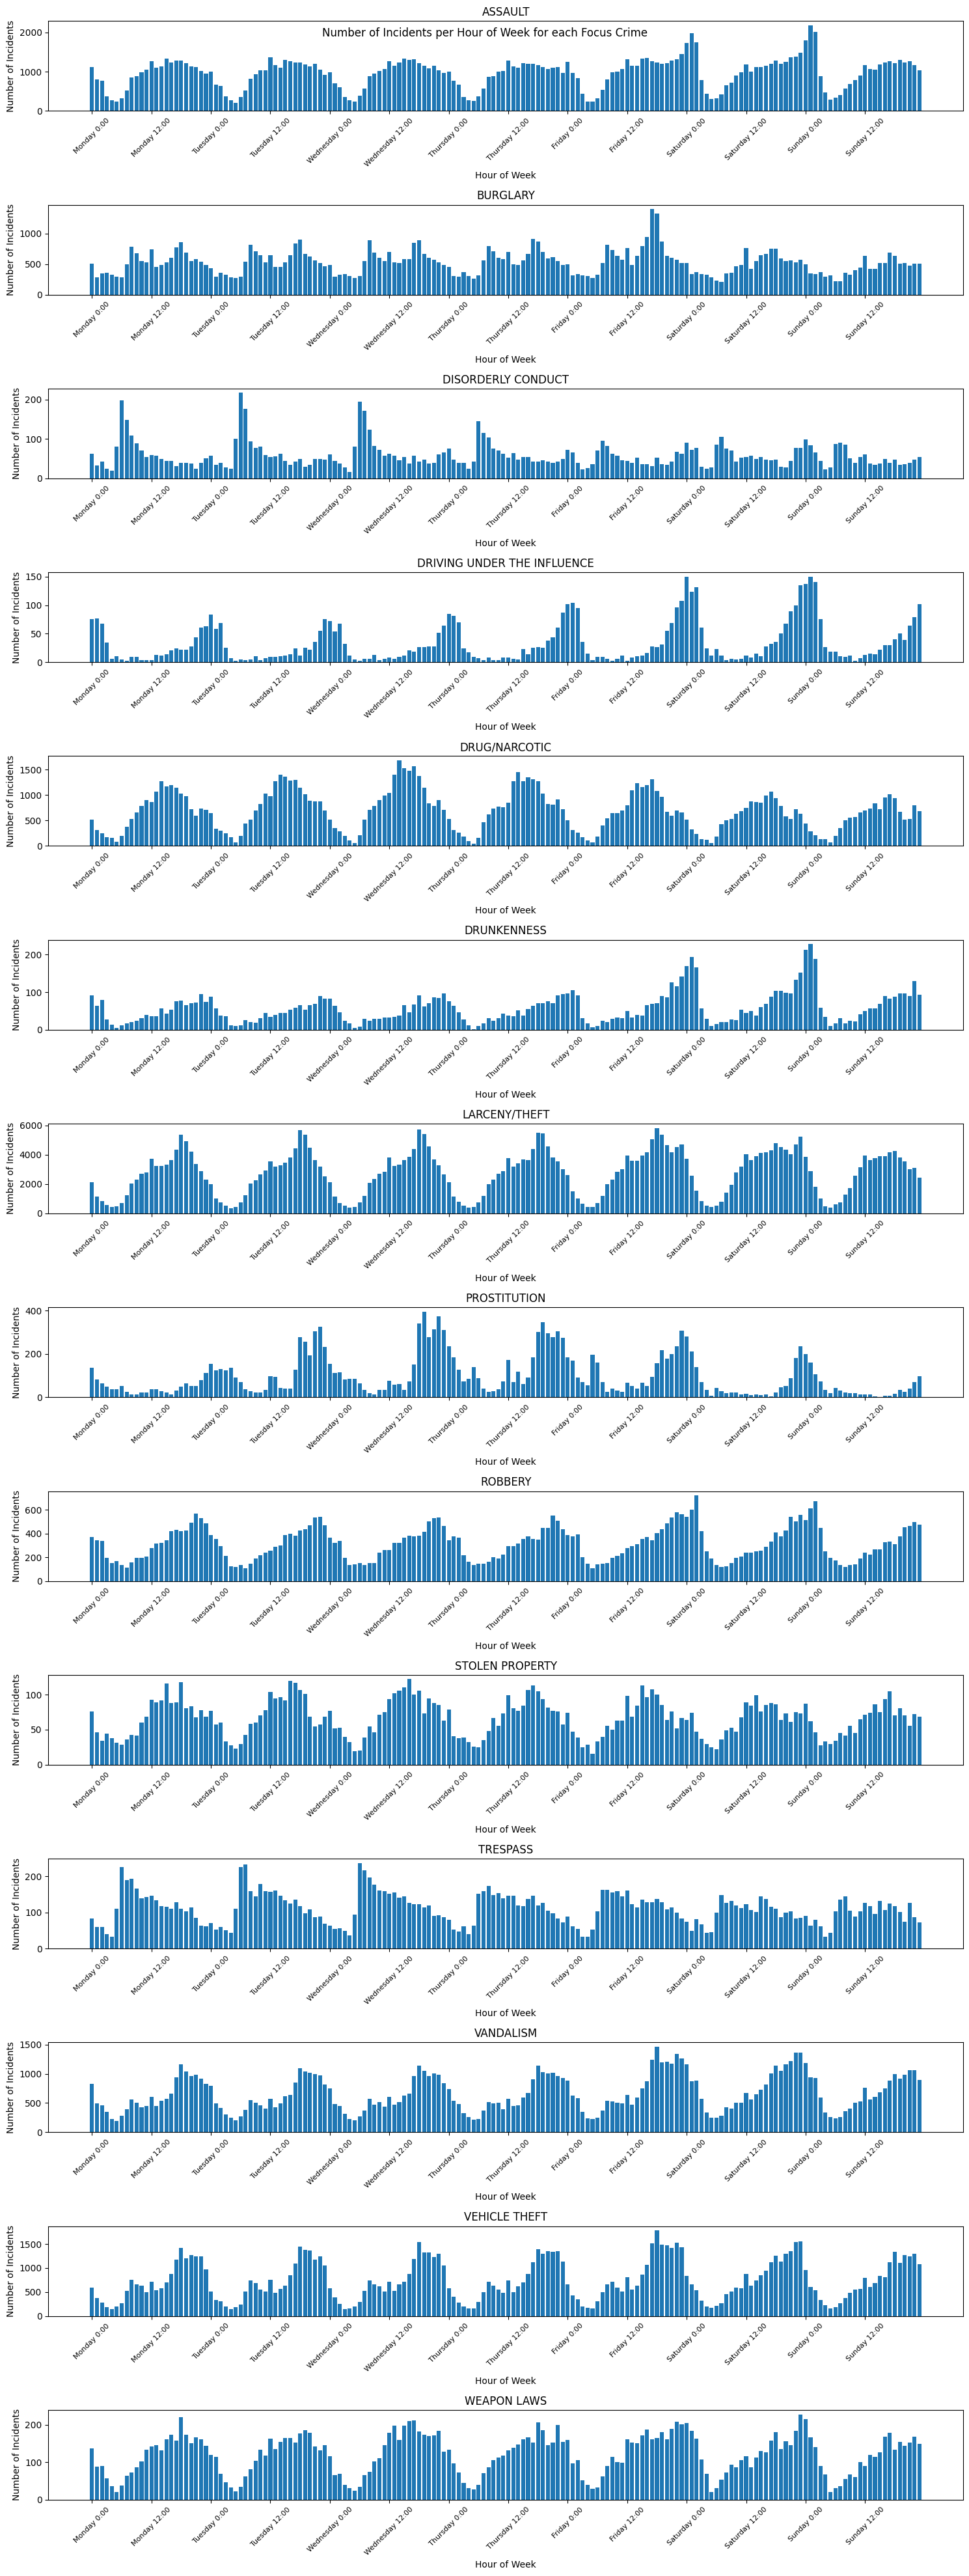

In [11]:
# Define a figure with a subplot for each focus crime
fig, axs = plt.subplots(len(focuscrimes), 1, figsize=(15, 40))

# Iterate over each focus crime and create a bar chart
for i, crime in enumerate(focuscrimes):
    # Filter data for the current crime
    crime_df = initial_data_df[initial_data_df['Category'] == crime]
    crime_df['HourOfWeek'] = crime_df['Date'].dt.dayofweek * 24 + crime_df['Hour']
    crime_df = crime_df.groupby('HourOfWeek').size()

    # Plot the bar chart on the corresponding subplot
    axs[i].bar(crime_df.index, crime_df.values)
    axs[i].set_title(crime)
    axs[i].set_xlabel('Hour of Week')
    axs[i].set_ylabel('Number of Incidents')
    # Set x-axis labels but only every 12th label
    axs[i].set_xticks(np.arange(0, 24 * 7, 12))
    axs[i].set_xticklabels([f"{days_mapping[j // 24]} {j % 24}:00" for j in np.arange(0, 24 * 7, 12)])

# Rotate x-axis labels for all subplots
for ax in axs:
    ax.tick_params(axis='x', rotation=45, labelsize=8)

# fig title and add space between title and subplots
fig.suptitle('Number of Incidents per Hour of Week for each Focus Crime')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Comment

From the plot it seems that the violent crimes are more common during the Friday and weekend time.  
Prostituion and drug/narcotic crimes are more during weekdays. There is a huge decrease in the number of prostitution reports during the weekend.  
Finally, as expected DUIs and drunkenness are more common during the weekend.  

### Question

* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

### Code Solution

In [8]:
# %pip install calplot

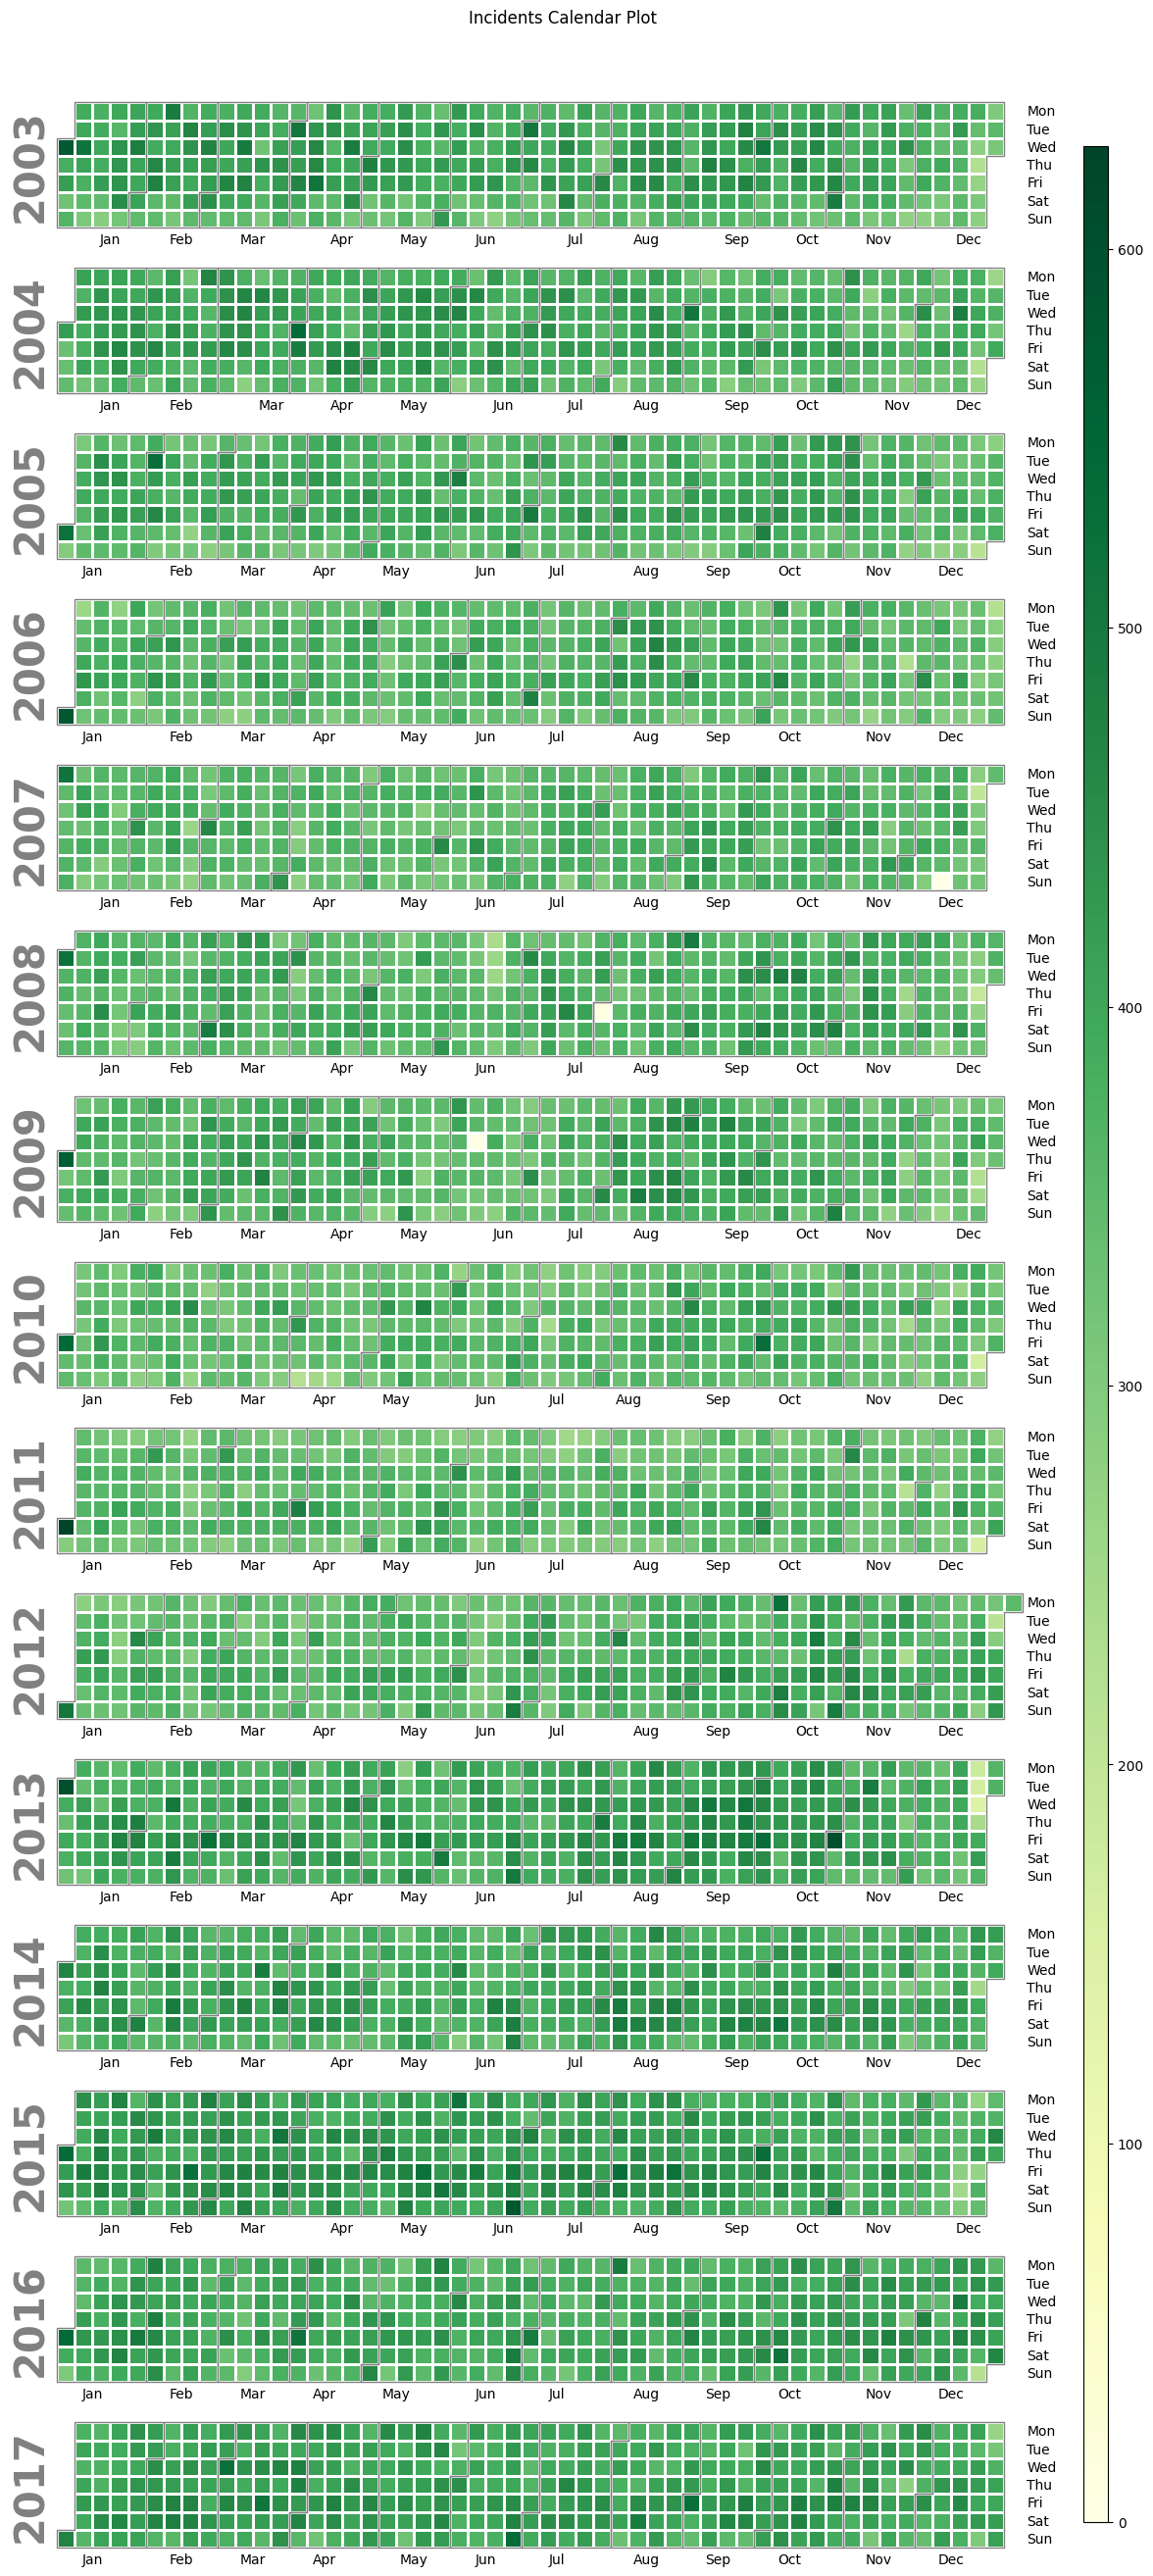

In [9]:
selected_crime = "DRIVING UNDER THE INFLUENCE"
import calplot

incident_counts = initial_data_df['Date'].value_counts().sort_index()
calplot.calplot(incident_counts, cmap='YlGn', suptitle='Incidents Calendar Plot')
plt.show()


### Comments

- A clear thing to notice is that Fridays and Saturdays are the days with the most incidents.
- A sad pattern is that people start the new year with a lot of drinking and unfortunately also driving under the influence.
- There is also a high number of incidents during the last day of June.

### Question

* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

### Code Solution

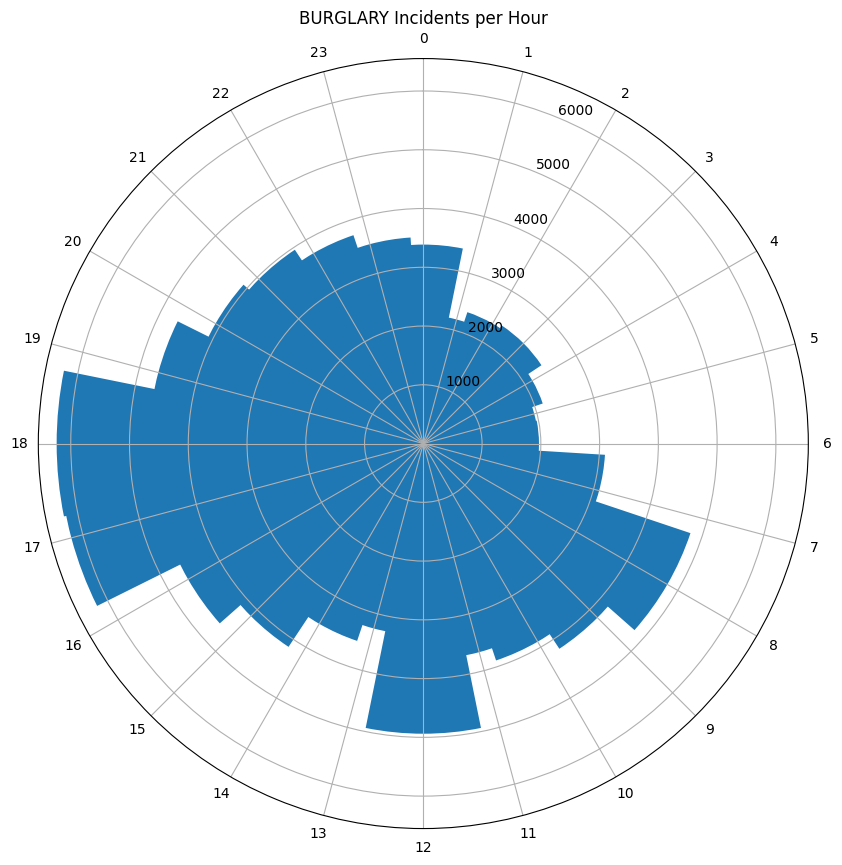

In [10]:
selected_crime = "BURGLARY"

# group by hour the burglary data
burglary_df = initial_data_df[initial_data_df['Category'] == selected_crime]
burglary_df = burglary_df.groupby('Hour').size()

# Assuming burglary_df and other variables are properly defined
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))
theta = np.linspace(0, 2 * np.pi, len(burglary_df), endpoint=False) # Ensure it covers 0 to 23 hours

bars = ax.bar(theta, burglary_df, width=0.4, bottom=0.2)
ax.set_title(selected_crime+" Incidents per Hour")

# Use hours as x-axis labels
hour_labels = [str(hour) for hour in range(24)]
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(hour_labels)
# rotate so that 0 is at the top and 1 is to the right 
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

plt.show()



### Comments

I am surprised to see that the majority of the incidents happens in the evening. I had the impression that most of the incidents would happen during the night/early morning.  
However, it is makes sense as people are more likely to be out and about during the evening.  
It is "funny" to see that during miday there are more burglaries than during almost all night long (after midnight).

### Question

* Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).

### Answer

I am using LLMs to solve these assignments.  
I use both chatgpt and github copilot to help me with the code.  
Typically, I try to understand the question and then I write the needed code. Whenever I am stuck, but I know the logical steps to solve the problem, I create a comment with the steps and then I wait for github copilot to suggest me the code.  
I **always** check the code that github copilot suggests me, as it is not always correct.  
In case that github suggestions do not satisfy me, I use either chatgpt to modify the code as I describe e.g. "Rotate the polar plot so that 0 is at the top" or I use stackoverflow-like solutions.
One last thing that I'd like to mention is that whenever I want to check the available arguments of a function that an llm generated, I typically go direct to the library's documentation.

## A1 Part 2: Dataviz questions 

Have a look at the Data Viz intro lecture (Week 2), then answer the following questions in your own words. 

### Question

* What is the difference between data and metadata? How does that relate to the GPS tracks-example?

### Answer

Data is the raw actual information that is being measured, observed and collected.  
Metadata is the data that describes the data. It provides extra information about the data that is being collected.  
In the GPS tracks-example, the data is the actual GPS coordinates (longitude,l atitude and time).  
Metadata would be the information about the GPS device , version etc.

### Question

* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.
  - Mention something that the human eye is very good at.
  - Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.

### Answer

Yes I do agree. First of all, data analysis is about analyzing data and showing the results to humans. Therefore, for me by definition (my definition) the human eye is the end user of the data analysis, thus a great tool.
The human eye is exteremly good at fast comparisons, by this I mean that if two plots have the same axis and the same scale, then the human eye can easily compare the two plots in a split second.  
On the other hand the human eye at least in most cases is limited to two dimentions. Therefore, tricks such as "fake" 3d plots in 2 dimensions or extra coloring and scaling have to be introduced to help the human eye to understand the data. A difficult example that comes to my mind is the "fake" 3d plots. 

### Question

* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

### Answer

On of the most common examples of Simpson's paradox are medical examples.
Lets suppose that we want to test drug A and drug B in two different days.
|  | Drug A | Drug B |
|----------|----------|----------|
| Day 1    | 63/90 = 70%    | 8/10 = 80%    |
| Day2    | 4/10 = 40%    | 45/90 = 50%    |
| Total    | 67/100 = 67%    | 53/100 = 53%    |  

In this case we can see that if we compare the drug tests day by day, then drug B is better than drug A. However, if we compare the total results, then drug A is better than drug B.


### Question

* In your own words, explain the differnece between exploratory and explanatory data analysis.

### Answer

Exploratory Data Analysis is the process of exploring the data to understand its underlying patterns, relationships, and anomalies without having any predefined hypotheses. This process involves visualizing, summarizing, and manipulating the data to uncover insights and inform further analysis strategies. On the other hand, Explanatory Data Analysis occurs after hypotheses have been formulated. Its primary goal is to confirm or reject these hypotheses and explain the findings.  
In other words, exploratory data analysis is the process of understanding the data and explanatory data analysis is the process of explaining the data and always the exploratory data analysis comes first.  

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.
* Did you find LLMs useful for anything in this exercise? Explain why/why not.

Use at most 125 words per sub-question.

# Contributions


**s223481 Xhino Mullaymeri** contributed **100%** to this assignment.